In [59]:
import math
import random
from copy import deepcopy
import matplotlib.pyplot as plt
from tqdm import tqdm

random.seed(69)

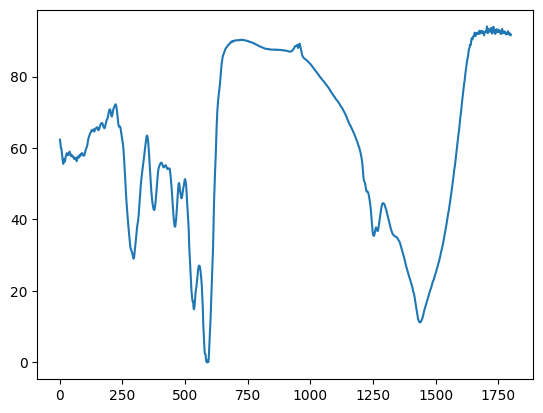

In [82]:
import pandas as pd

df = pd.read_csv('data.csv', sep = ";")

# x = list(df.columns.values)[1:]
# x = [float(i) for i in x]
s = df.loc[2, :].values.tolist()[1:]

min_s = abs(min(s))
for i in range(len(s)):
    s[i] += min_s
max_s = max(s)
for i in range(len(s)):
    s[i] *= 94 / max_s

x = list(range(1, 1801))

plt.plot(x, s)
plt.show()

In [145]:
def g(x, a, b, c):
    if sigma != 0:
        return a * math.exp(- math.pow(x - b, 2) / (2 * math.pow(c, 2)))
    else:
        return 0

def f(x, params):
    result = 0
    for i in range(len(params)):
        result += g(x, params[i][0], params[i][1], params[i][2])
    return result

def mse(params):
    result = 0
    for i in range(len(x)):
        result += math.pow(s[i] - f(x[i], params), 2)
    return result

def clonal_selection(fitness_function, population_size, n_iterations):
    number_of_gaussians = 15
    
    percentage_of_cloning = 1
    clone_size = 98
    mutation_rate = 1

    population = []
    max_fit = []
    avg_fit = []
    
    for i in range(population_size):
        individual = []
        for j in range(number_of_gaussians):
            individual.append([random.randrange(0, 100), random.randrange(0, 1800), random.randrange(1, 1000)])
        population.append(individual)

    with tqdm(total=n_iterations) as pbar:
        for i in range(n_iterations):
            population = sorted(population, key=lambda x: fitness_function(x))
            max_fit.append(mse(population[0]))
            if not (i + 1) % 20: 
                avg_pop_fit = 0
                for l in range(len(population)):
                    avg_pop_fit += mse(population[l])
                avg_fit.append(avg_pop_fit)
            
            new_population = []
            for individual in population[:len(population) * percentage_of_cloning // 100]:
                clones = [individual.copy() for j in range(clone_size)]
                for clone in clones:
                    if random.random() < mutation_rate:
                        clone[random.randint(0, len(clone) - 1)] = [random.randrange(0, 100), random.randrange(0, 1800), random.randrange(1, 1000)]
                new_population.extend(clones)
            new_population.extend(population)
            population = new_population[:population_size]
            pbar.update(1)
    return population[0], max_fit, avg_fit

100%|████████████████████████████████████████████████████████████████████████████| 3000/3000 [4:49:16<00:00,  5.79s/it]


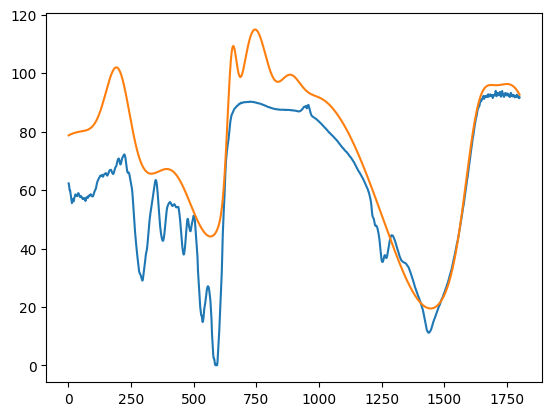

In [146]:
best_ind, max_fit, avg_fit = clonal_selection(mse, 500, 3000)

fun = []
for xi in x:
    fun.append(f(xi, best_ind))
plt.plot(x, s)
plt.plot(x, fun)
plt.show()

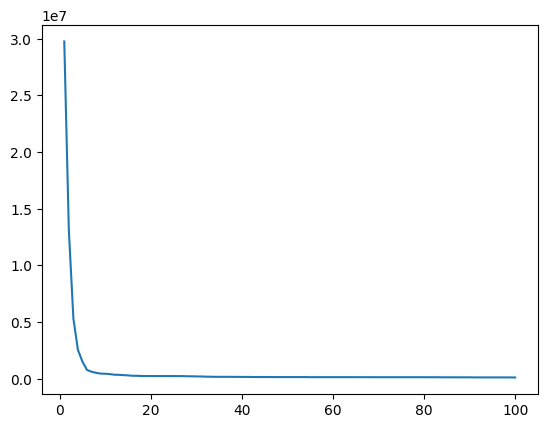

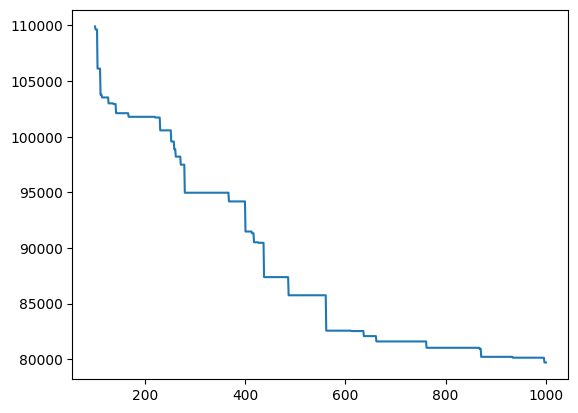

In [143]:
split = 100
y1 = list(range(1, split + 1))
plt.plot(y1, max_fit[:split])
plt.show()
y2 = list(range(split + 1, len(max_fit) + 1))
plt.plot(y2, max_fit[split:])
plt.show()

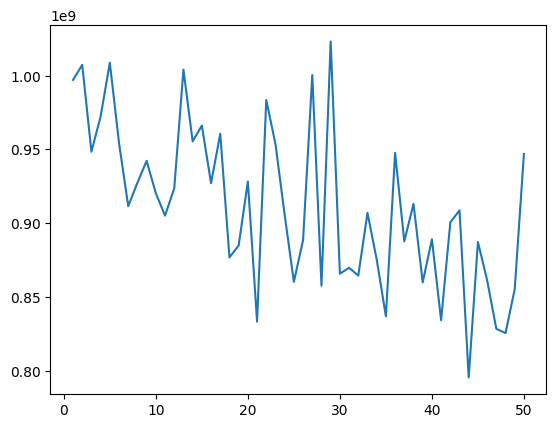

In [136]:
y = list(range(1, len(avg_fit) + 1))
plt.plot(y, avg_fit)
plt.show()

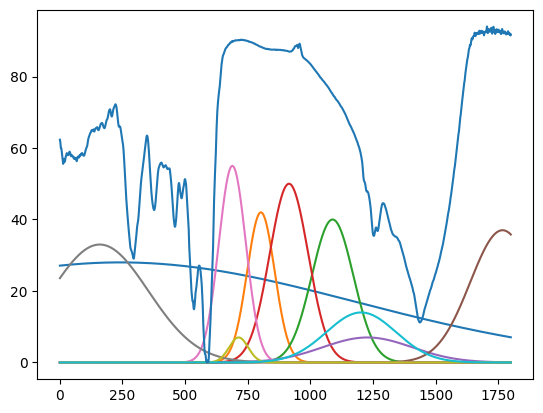

In [141]:
for i in range(len(best_ind)):
    fun = []
    for xi in x:
        fun.append(g(xi, best_ind[i][0], best_ind[i][1], best_ind[i][2]))
    plt.plot(x, fun)
plt.plot(x, s)
plt.show()